In [2]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf #引入类似R语言表达式模块接口

#### load data

In [4]:
data = sm.datasets.get_rdataset('Guerry','HistData').data
data

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
5,7,S,Ardeche,9474,10263,27,3188,42117,52547,1:Sm,...,76,47,67,70,19,62,1,279.413,5529,340.73
6,8,N,Ardennes,35203,8847,67,6400,16106,26198,2:Med,...,53,85,49,31,62,9,83,105.694,5229,289.62
7,9,S,Ariege,6173,9597,18,3542,22916,123625,1:Sm,...,74,28,63,75,22,77,3,385.313,4890,253.12
8,10,E,Aube,19602,4086,59,3608,18642,10989,2:Med,...,77,54,9,28,86,15,207,83.244,6004,246.36
9,11,S,Aude,15647,10431,34,2582,20225,66498,2:Med,...,80,35,27,50,63,48,1,370.949,6139,270.13


#### OLS回归 - 使用R模块接口- Fit regression model (using the natural log of one of the regressors)


In [15]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=data).fit()

In [8]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.90e-08
Time:                        16:00:12   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

#### 不使用接口的OLS

In [10]:
import numpy as np
import statsmodels.api as sm

In [51]:
nobs = 100
X = np.random.random((nobs,2))
X = sm.add_constant(X) #添加一列1
beta = [1,.1,.5]
e = np.random.random(nobs)
y = np.dot(X,beta) + e
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     15.96
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.02e-06
Time:                        10:42:22   Log-Likelihood:                -23.541
No. Observations:                 100   AIC:                             53.08
Df Residuals:                      97   BIC:                             60.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4837      0.081     18.359      0.0

# getting started

### Loading modules and functions

In [50]:
from __future__ import print_function #即使在python2.X，使用print就得像python3.X那样加括号使用。python2.X中print不需要括号，而在python3.X中则需要。
import statsmodels.api as sm
import pandas
from patsy import dmatrices # 用类似于R里面的语法描述统计模型，建立设计矩阵.

### Data

In [28]:
# 收集分析像犯罪率，文化程度，自杀率等社会数据，研究社会法律和这些变量间的关系
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [52]:
df = df.dropna()

### 设计矩阵

In [65]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe') #直接产生交叉矩阵,字符型会直接one-hot，作为dummy变量

In [41]:
a = df.groupby('Region')

In [45]:
a.groups

{'C': Int64Index([2, 13, 16, 17, 20, 25, 33, 34, 38, 39, 40, 42, 55, 60, 69, 82, 84], dtype='int64'),
 'E': Int64Index([0, 3, 4, 8, 18, 22, 23, 35, 36, 49, 51, 64, 65, 66, 67, 68, 83], dtype='int64'),
 'N': Int64Index([1, 6, 12, 24, 47, 48, 52, 54, 56, 57, 58, 59, 70, 71, 72, 73, 75], dtype='int64'),
 'S': Int64Index([5, 7, 9, 10, 11, 27, 28, 29, 31, 43, 45, 62, 63, 76, 77, 78, 79], dtype='int64'),
 'W': Int64Index([14, 15, 19, 21, 26, 30, 32, 37, 41, 44, 46, 50, 53, 61, 74, 80,
             81],
            dtype='int64')}

In [49]:
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


### fit model and summary

In [67]:
mod = sm.OLS(y, X) 

In [68]:
res = mod.fit()

In [69]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.07e-05
Time:                        10:50:42   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [70]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [72]:
res.rsquared

0.3379508691928822

In [73]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [75]:
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

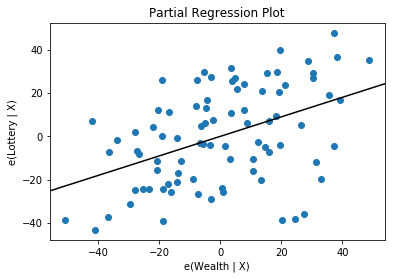

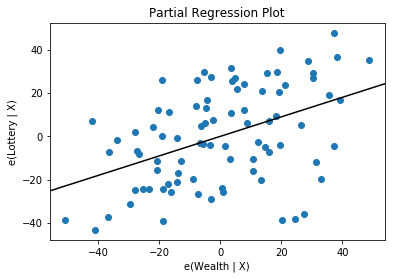

In [79]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], data=df, obs_labels=False)


# Fitting models using R-style formulas

### Loading modules and functions

In [85]:
import statsmodels.api as sm #仅用来加载数据集
import statsmodels.formula.api as smf #包括大写小写名称的统计模型
import numpy as np
import pandas

In [83]:
dir(smf)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PHReg',
 'Poisson',
 'Probit',
 'QuantReg',
 'RLM',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gee',
 'glm',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

### OLS regression using formulas

In [87]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [128]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)  #对于文本型，会自动作为分类变量处理
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           1.07e-05
Time:                        14:47:35   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [91]:
res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit() #对于不是字符串的分类数据，通过C()处理
print(res.params)

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64


### operators

In [92]:
 res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region) -1 ', data=df).fit() #负号去除变量

In [93]:
res1 = smf.ols(formula='Lottery ~ Literacy : Wealth - 1', data=df).fit() #冒号表示两列交叉变量
res2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit() #*表示列本身及其乘积
print(res1.params)
print(res2.params)

Literacy:Wealth    0.018176
dtype: float64
Literacy           0.427386
Wealth             1.080987
Literacy:Wealth   -0.013609
dtype: float64


### Functions

In [95]:
def log_plus_1(x):
    return np.log(x) + 1.0

res = smf.ols(formula='Lottery ~ log_plus_1(Literacy)', data=df).fit()
print(res.params)

Intercept               136.003079
log_plus_1(Literacy)    -20.393959
dtype: float64


### Using formulas with models that do not (yet) support them #不使用规则表达式

In [96]:
import patsy

In [98]:
f = 'Lottery ~ Literacy * Wealth'
y, X = patsy.dmatrices(f, df, return_type='matrix')
print(y[:5])
print(X[:5])

[[41.]
 [38.]
 [66.]
 [80.]
 [79.]]
[[1.000e+00 3.700e+01 7.300e+01 2.701e+03]
 [1.000e+00 5.100e+01 2.200e+01 1.122e+03]
 [1.000e+00 1.300e+01 6.100e+01 7.930e+02]
 [1.000e+00 4.600e+01 7.600e+01 3.496e+03]
 [1.000e+00 6.900e+01 8.300e+01 5.727e+03]]


In [99]:
f = 'Lottery ~ Literacy * Wealth'
y, X = patsy.dmatrices(f, df, return_type='dataframe')
print(y[:5])
print(X[:5])

   Lottery
0     41.0
1     38.0
2     66.0
3     80.0
4     79.0
   Intercept  Literacy  Wealth  Literacy:Wealth
0        1.0      37.0    73.0           2701.0
1        1.0      51.0    22.0           1122.0
2        1.0      13.0    61.0            793.0
3        1.0      46.0    76.0           3496.0
4        1.0      69.0    83.0           5727.0


In [101]:
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.32e-06
Time:                        14:30:59   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

# Import Paths and Structure

In [102]:
import statsmodels.api as sm

In [117]:
dir(sm)
#dir(sm.graphics)
#dir(sm.tsa)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'genmod',
 'graphics',
 'iolib',
 'load',
 'nonparametric',
 'qqline',
 'qqplot',
 'qqplot_2samples',
 'regression',
 'robust',
 'show_versions',
 'stats',
 'test',
 'tools',
 'tsa',
 'version',
 'webdoc']

In [110]:
dir(sm.regression)

['Tester',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_prediction',
 'linear_model',
 'mixed_linear_model',
 'quantile_regression',
 'recursive_ls',
 'test',
 'yule_walker']

In [113]:
from statsmodels.regression.linear_model import OLS, WLS
from statsmodels.tools.tools import rank, add_constant
from statsmodels.datasets import macrodata
from statsmodels.stats import diagnostic
import statsmodels.regression.linear_model as lm
import statsmodels.stats.diagnostic as smsdia
import statsmodels.stats.outliers_influence as oi

# Linear Regression

In [118]:
import numpy as np
import statsmodels.api as sm
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Wed, 25 Jul 2018   Prob (F-statistic):            0.00157
Time:                        14:05:17   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

# Generalized Linear Models

In [120]:
import statsmodels.api as sm
data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())
gamma_results = gamma_model.fit()
print(gamma_results.summary())

D:\Program Files\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


                  Generalized Linear Model Regression Results                   
Dep. Variable:                      y   No. Observations:                     32
Model:                            GLM   Df Residuals:                         24
Model Family:                   Gamma   Df Model:                              7
Link Function:          inverse_power   Scale:              0.003584283173493356
Method:                          IRLS   Log-Likelihood:                  -83.017
Date:                Wed, 25 Jul 2018   Deviance:                       0.087389
Time:                        14:12:07   Pearson chi2:                     0.0860
No. Iterations:                     4                                           
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122      -0.040       0.005
x1          4.962e-05   1.62e-05  

## logti regression

In [121]:
lg = smf.glm('churn ~ duration', data=pd.concat([X_train,y_train],axis=1), family=sm.families.Binomial(sm.families.links.logit)).fit()
lg.summary()

NameError: name 'pd' is not defined

In [ ]:
sm.Logit()